# 1- Data preparation

In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv(r'data\BankChurners.csv')

In [64]:
df.head(), df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

(   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
 0  768805383  Existing Customer            45      M                3   
 1  818770008  Existing Customer            49      F                5   
 2  713982108  Existing Customer            51      M                3   
 3  769911858  Existing Customer            40      F                4   
 4  709106358  Existing Customer            40      M                3   
 
   Education_Level Marital_Status Income_Category Card_Category  \
 0     High School        Married     $60K - $80K          Blue   
 1        Graduate         Single  Less than $40K          Blue   
 2        Graduate        Married    $80K - $120K          Blue   
 3     High School        Unknown  Less than $40K          Blue   
 4      Uneducated        Married     $60K - $80K          Blue   
 
    Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
 0              39  ...       12691.0                  777          119

### Data Overview

- **Attrition_Flag**: Indicates whether a customer has left the bank or not.
- **Customer_Age, Gender, Dependent_count**: Demographic information including age, gender, and number of dependents.
- **Education_Level, Marital_Status, Income_Category**: Details on the customer’s education, marital status, and income bracket.
- **Card_Category**: Type of card (e.g., Blue, Silver, Gold).
- **Months_on_book**: Length of relationship with the bank in months.
- **Total_Relationship_Count**: Number of products held by the customer with the bank.
- **Months_Inactive_12_mon**: Number of months the customer was inactive in the last 12 months.
- **Contacts_Count_12_mon**: Number of times customer contacted the bank in the last 12 months.
- **Credit_Limit, Total_Revolving_Bal**: Credit-related details such as credit limit and total revolving balance.
- **Avg_Open_To_Buy**: Difference between credit limit and the revolving balance.
- **Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct**: Information on the transaction amount and change from Q4 to Q1.
- **Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio**: Metrics related to credit card utilization.

In [65]:
# Drop the last two columns
df= df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'] )

In [66]:
# Handling Missing Values
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [67]:
# Label Encoding for Gender: M=1, F=0
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [68]:
# Label Encoding for Attrition_Flag: Existing Customer=1, Attrited Customer=0
label_encoder = LabelEncoder()
df["Attrition_Flag"] = label_encoder.fit_transform(df["Attrition_Flag"])

In [69]:
unique_education_levels = df['Education_Level'].unique()
print(unique_education_levels)

['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']


In [70]:
# Mapping education level
education_level_mapping = {
    'Unknown': 0,
    'Uneducated': 1,
    'High School': 2,
    'College': 3,
    'Graduate': 4,
    'Post-Graduate': 5,
    'Doctorate': 6
}

# Replace values in the 'Education_Level' column using numbers
df['Education_Level'] = df['Education_Level'].map(education_level_mapping)


In [71]:
unique_Card_Category = df['Card_Category'].unique()
print(unique_Card_Category)

['Blue' 'Gold' 'Silver' 'Platinum']


In [72]:
# Define the custom mapping dictionary based on hierarchy
Card_Category_mapping = {
    'Blue' : 0,
    'Silver' : 1,
    'Gold' : 2,
    'Platinum' : 3
}

df['Card_Category'] = df['Card_Category'].map(Card_Category_mapping)

In [73]:
unique_Income_Category = df['Income_Category'].unique()
print(unique_Income_Category)

['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']


In [74]:
# Define the custom mapping dictionary based on hierarchy
Income_Category_mapping = {
    'Unknown' : 0,
    'Less than $40K' : 1,
    '$40K - $60K' : 2,
    '$60K - $80K' : 3,
    '$80K - $120K' : 4,
    '$120K +' : 5,
}

df['Income_Category'] = df['Income_Category'].map(Income_Category_mapping)

In [75]:
unique_Marital_Status = df['Marital_Status'].unique()
print(unique_Marital_Status)

['Married' 'Single' 'Unknown' 'Divorced']


In [76]:
# Perform one-hot encoding on the 'Marital_Status' column: Convert categorical variable into dummy/indicator variables.
df = pd.get_dummies(df, columns=['Marital_Status'], drop_first=True, dtype=int)

In [77]:
print(df.dtypes)

CLIENTNUM                     int64
Attrition_Flag                int32
Customer_Age                  int64
Gender                        int32
Dependent_count               int64
Education_Level               int64
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Marital_Status_Married        int32
Marital_Status_Single         int32
Marital_Status_Unknown        int32
dtype: object


In [78]:
# save a new csv file that we want to work on it 
df.to_csv("data/BankChurners_preprocessed.csv", index=False)

# 2- knowing dataset more 

<>:4: SyntaxWarning: invalid escape sequence '\B'
<>:4: SyntaxWarning: invalid escape sequence '\B'
C:\Users\Nasrin\AppData\Local\Temp\ipykernel_20412\1136063948.py:4: SyntaxWarning: invalid escape sequence '\B'
  df = pd.read_csv('data\BankChurners_preprocessed.csv')


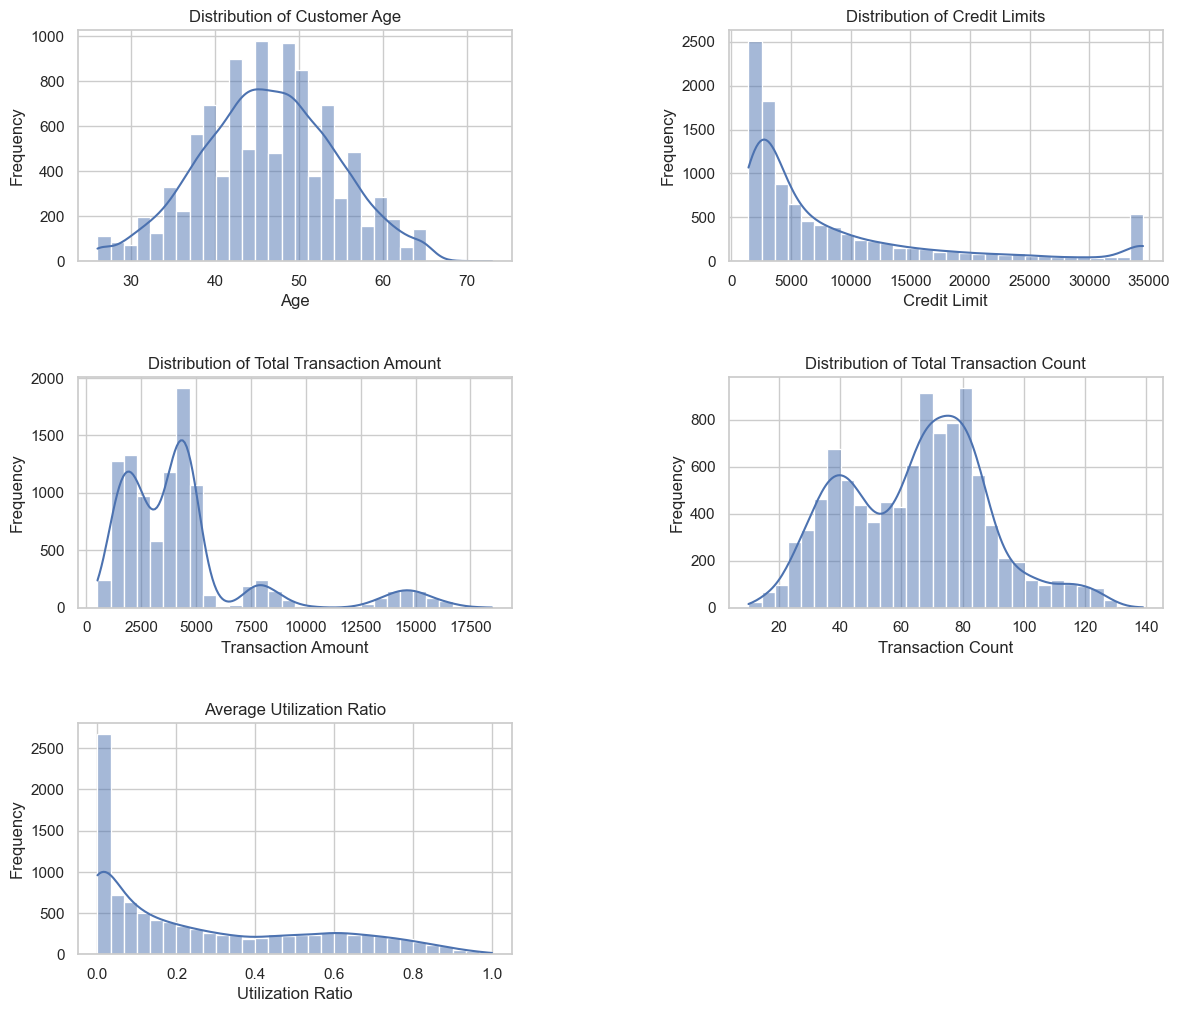

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data\BankChurners_preprocessed.csv')
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure to hold the visualizations
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Plot 1: Customer Age Distribution
sns.histplot(df['Customer_Age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Customer Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Plot 2: Credit Limit Distribution
sns.histplot(df['Credit_Limit'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Credit Limits')
axes[0, 1].set_xlabel('Credit Limit')
axes[0, 1].set_ylabel('Frequency')

# Plot 3: Total Transactions Amount Distribution
sns.histplot(df['Total_Trans_Amt'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Total Transaction Amount')
axes[1, 0].set_xlabel('Transaction Amount')
axes[1, 0].set_ylabel('Frequency')

# Plot 4: Total Transactions Count Distribution
sns.histplot(df['Total_Trans_Ct'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Total Transaction Count')
axes[1, 1].set_xlabel('Transaction Count')
axes[1, 1].set_ylabel('Frequency')

# Plot 5: Average Utilization Ratio Distribution
sns.histplot(df['Avg_Utilization_Ratio'], bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Average Utilization Ratio')
axes[2, 0].set_xlabel('Utilization Ratio')
axes[2, 0].set_ylabel('Frequency')

# Hide the empty subplot
axes[2, 1].axis('off')

plt.show()


- **Distribution of Customer Age**: Most customers fall within the 40-50 age range, with a relatively normal distribution.
- **Distribution of Credit Limits**: The credit limit distribution is skewed to the right, suggesting most customers have lower credit limits, with a few having significantly higher limits.
- **Distribution of Total Transaction Amount**: This is heavily right-skewed, indicating that most customers have lower transaction amounts, but there are outliers with very high transaction volumes.
- **Distribution of Total Transaction Count**: Similar to the transaction amount, the transaction count is also right-skewed, showing that most customers have fewer transactions, with fewer customers making many more transactions.
- **Average Utilization Ratio**: The utilization ratio shows a peak near zero, suggesting many customers use a small portion of their available credit, with fewer extending towards higher utilization.